In [1]:
import requests
from bs4 import BeautifulSoup
import csv


url = "https://books.toscrape.com/"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')


books = soup.find_all('article', class_='product_pod')[:10]


data = []
for book in books:
    title = book.h3.a['title']
    price = book.find('p', class_='price_color').text
    data.append([title, price])
    print(f"Title: {title}, Price: {price}")


with open('books.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(['Title', 'Price'])
    writer.writerows(data)

print("\nData saved to books.csv")


Title: A Light in the Attic, Price: Â£51.77
Title: Tipping the Velvet, Price: Â£53.74
Title: Soumission, Price: Â£50.10
Title: Sharp Objects, Price: Â£47.82
Title: Sapiens: A Brief History of Humankind, Price: Â£54.23
Title: The Requiem Red, Price: Â£22.65
Title: The Dirty Little Secrets of Getting Your Dream Job, Price: Â£33.34
Title: The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull, Price: Â£17.93
Title: The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics, Price: Â£22.60
Title: The Black Maria, Price: Â£52.15

Data saved to books.csv


Question 2

        City  Temperature (°C)  Humidity (%)      Condition
0      Delhi             31.05            70  broken clouds
1     Mumbai             29.99            79           haze
2  Bangalore             26.42            77   thunderstorm
3    Kolkata             27.97            89           haze
4    Chennai             32.20            75           haze


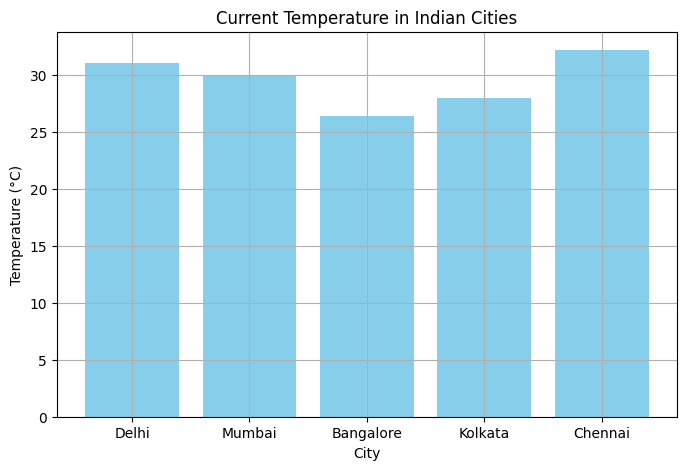

In [22]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Replace with your OpenWeather API key
api_key = 'f5e67cc6f2d767d6c7139057875346be'

# List of Indian cities
cities = ['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Chennai']

# Base URL
url = 'http://api.openweathermap.org/data/2.5/weather'

# Store results
weather_data = []

for city in cities:
    params = {'q': city, 'appid': api_key, 'units': 'metric'}
    response = requests.get(url, params=params)
    data = response.json()

    if response.status_code == 200:
        weather = {
            'City': city,
            'Temperature (°C)': data['main']['temp'],
            'Humidity (%)': data['main']['humidity'],
            'Condition': data['weather'][0]['description']
        }
        weather_data.append(weather)
    else:
        print(f"Failed to get data for {city}")

# Create DataFrame
df = pd.DataFrame(weather_data)
print(df)

# Plot bar chart of temperature
plt.figure(figsize=(8,5))
plt.bar(df['City'], df['Temperature (°C)'], color='skyblue')
plt.title('Current Temperature in Indian Cities')
plt.xlabel('City')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()
